# Read dicom files


## set up environment


In [10]:
!pip install DicomRTTool


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install SimpleITK


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [12]:
from DicomRTTool.ReaderWriter import DicomReaderWriter, ROIAssociationClass
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

## initialize DicomRTTool

In [13]:
def display_slices(image, mask, skip=1):
    """
    Displays a series of slices in z-direction that contains the segmented regions of interest.
    Ensures all contours are displayed in consistent and different colors.
        Parameters:
            image (array-like): Numpy array of image.
            mask (array-like): Numpy array of mask.
            skip (int): Only print every nth slice, i.e. if 3 only print every 3rd slice, default 1.
        Returns:
            None (series of in-line plots).
    """

    slice_locations = np.unique(np.where(mask != 0)[0]) # get indexes for where there is a contour present 
    slice_start = slice_locations[0] # first slice of contour 
    slice_end = slice_locations[len(slice_locations)-1] # last slice of contour
    
    counter = 1
    
    for img_arr, contour_arr in zip(image[slice_start:slice_end+1], mask[slice_start:slice_end+1]): # plot the slices with contours overlayed ontop
        if counter % skip == 0: # if current slice is divisible by desired skip amount 
            masked_contour_arr = np.ma.masked_where(contour_arr == 0, contour_arr)
            plt.imshow(img_arr, cmap='gray', interpolation='none')
            plt.imshow(masked_contour_arr, cmap='cool', interpolation='none', alpha=0.5, vmin = 1, vmax = np.amax(mask)) # vmax is set as total number of contours so same colors can be displayed for each slice
            plt.show()
        counter += 1

In [14]:

Dicom_path = r'/Users/zyzou/Desktop/data/NU0001/'
Dicom_reader = DicomReaderWriter(description='Examples', arg_max=True)
Dicom_reader.walk_through_folders(Dicom_path) # This will parse through all DICOM present in the folder and subfolders
all_rois = Dicom_reader.return_rois(print_rois=True) # Return a list of all rois present

# Contour_names = ['tumor'] # Define what rois you want
# associations = [ROIAssociationClass('tumor', ['tumor_mr', 'tumor_ct'])] # Any list of roi associations
# Dicom_reader.set_contour_names_and_assocations(contour_names=Contour_names, associations=associations)




Loading through DICOM files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading from /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_RTst_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000Loading from /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_RTPLAN_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000
Loading from /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_RTDOSE_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000
Loading from /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_CT_2018-10-08_144305_SBRT.Planning_NU.0001_n172__00000

Had an error loading /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_RTPLAN_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057282.346.7761.dcm


Loading through DICOM files: 100%|██████████| 4/4 [00:00<00:00,  8.95it/s]

Compiling dictionaries together...
Index 0, description NU_0001  at /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_CT_2018-10-08_144305_SBRT.Planning_NU.0001_n172__00000
Index 1, description None at None
2 unique series IDs were found. Default is index 0, to change use set_index(index)
The following ROIs were found
rlat bb
llat bb
ant bb
refpoint
txiso
heart
r.lung
l.lung
spinal cord
esophagus
carina and proximal tree
ribs
mg gtv ct planning
mg gtv mip
mg itv
mg ptv
ptv+0.3cm
ring_1.0cm
ring_2.0cm
ring_4.0cm
external
nt
5000 (trial_1)
2500 (trial_1)
total lung
d2cm


In [19]:
Contour_names = ['r.lung','l.lung']
Dicom_reader.set_contour_names_and_associations(contour_names=Contour_names)

Contour names or associations changed, resetting mask


In [20]:
indexes = Dicom_reader.which_indexes_have_all_rois()

The following indexes have all ROIs present
Index 0, located at /Users/zyzou/Desktop/data/NU0001/2018-10__Studies/NU.0001_NU.0001_CT_2018-10-08_144305_SBRT.Planning_NU.0001_n172__00000
Finished listing present indexes


In [21]:
pt_indx = indexes[-1]
Dicom_reader.set_index(pt_indx)  # This index has all the structures, corresponds to pre-RT T1-w image for patient 011
Dicom_reader.get_images_and_mask()  # Load up the images and mask for the requested index

In [22]:
image = Dicom_reader.ArrayDicom # image array
mask = Dicom_reader.mask # mask array

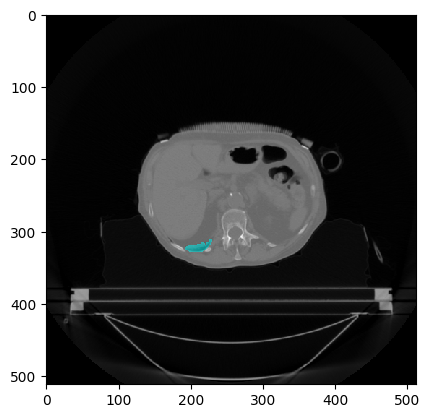

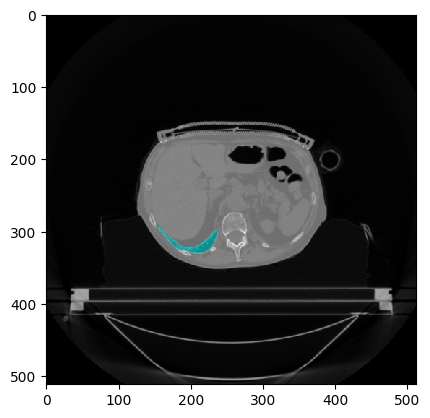

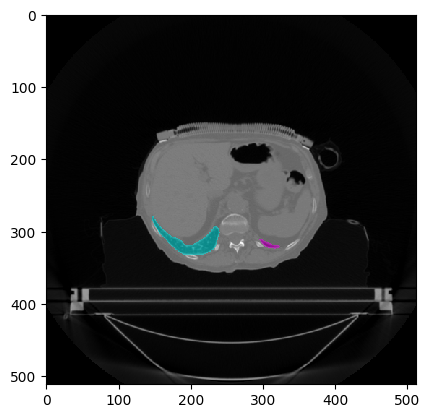

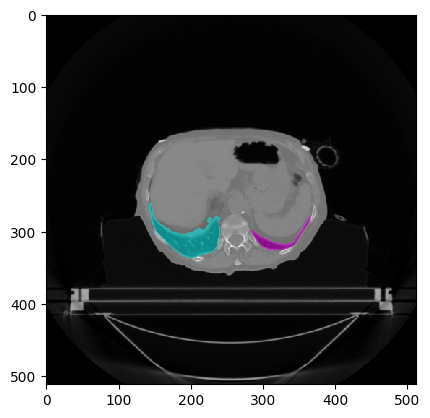

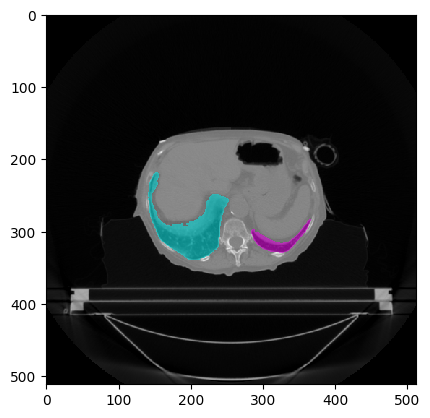

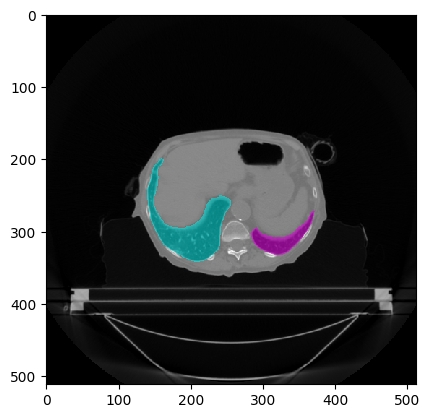

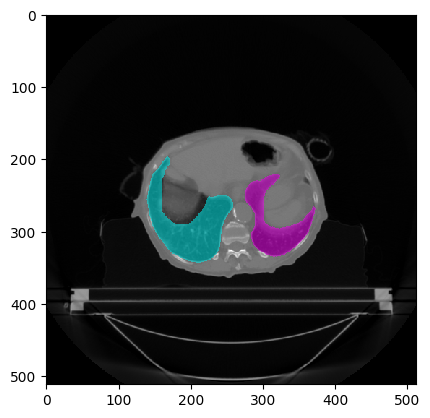

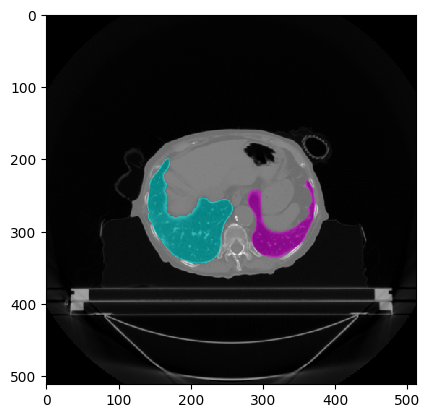

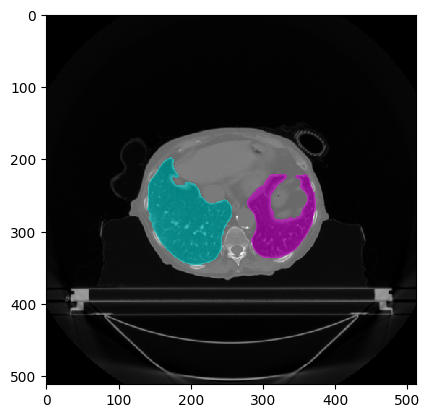

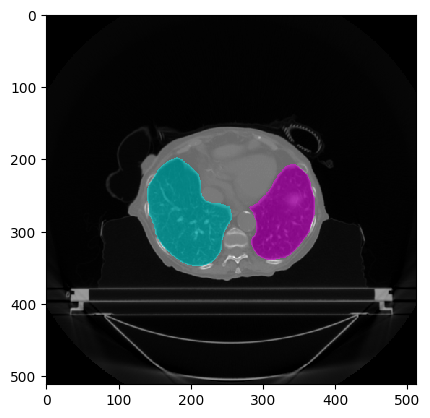

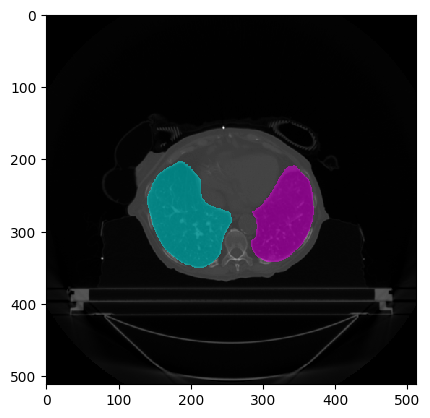

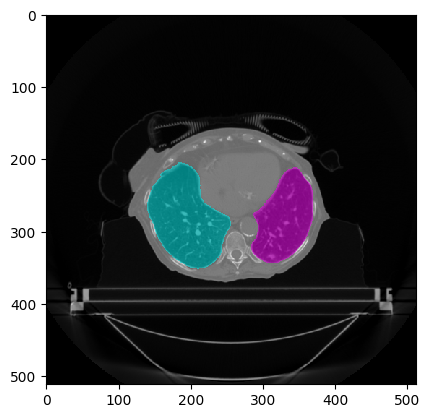

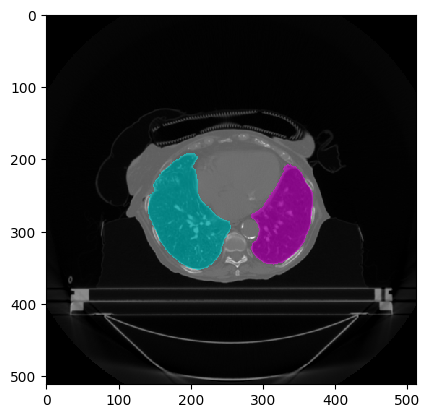

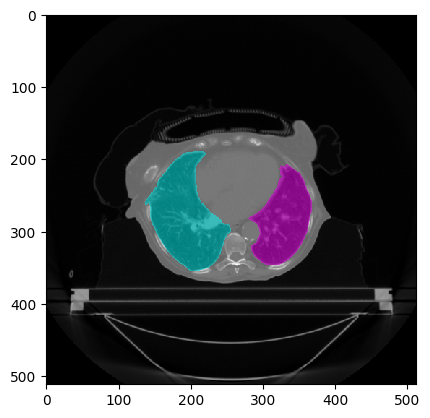

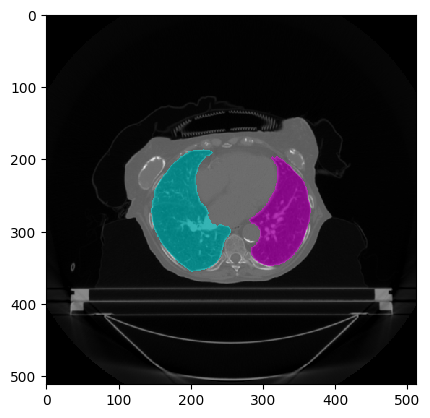

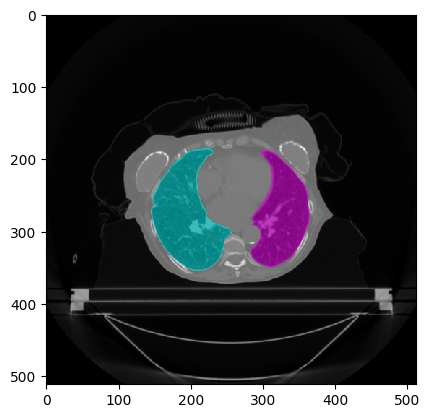

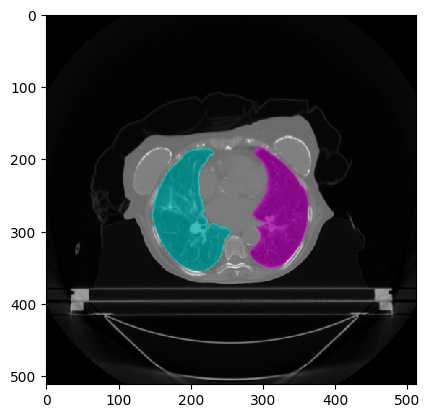

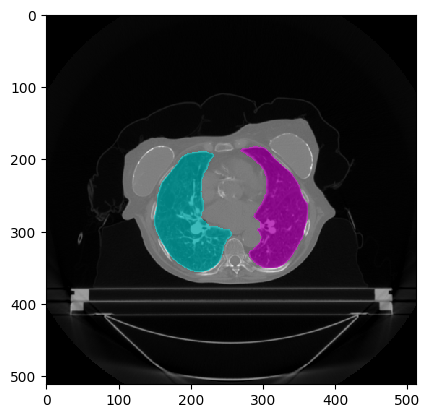

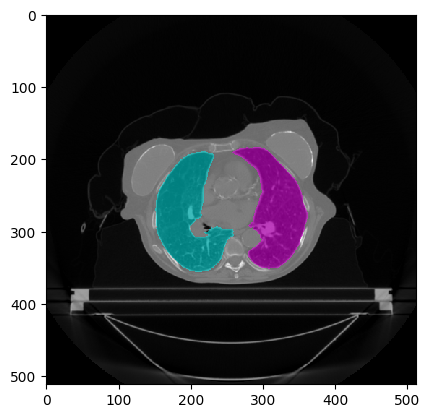

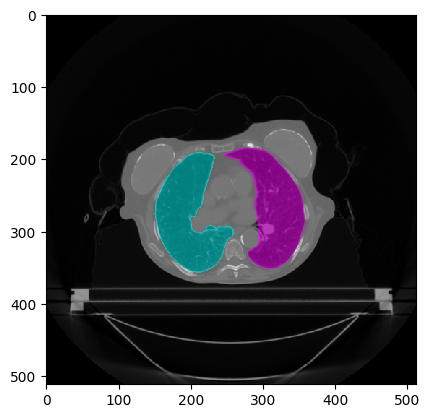

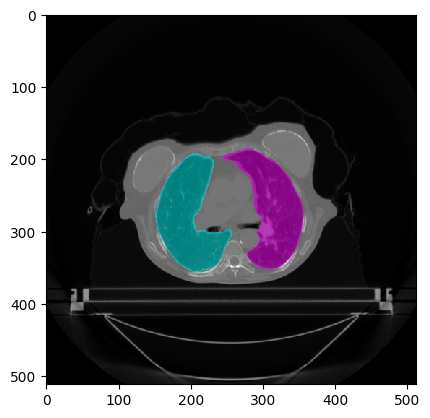

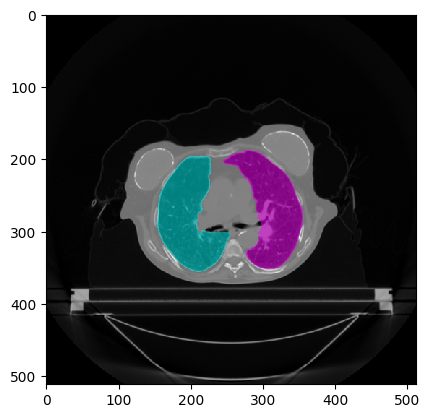

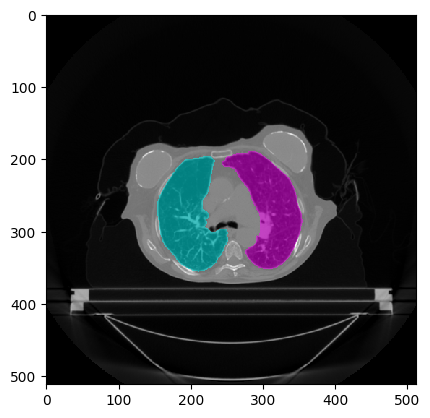

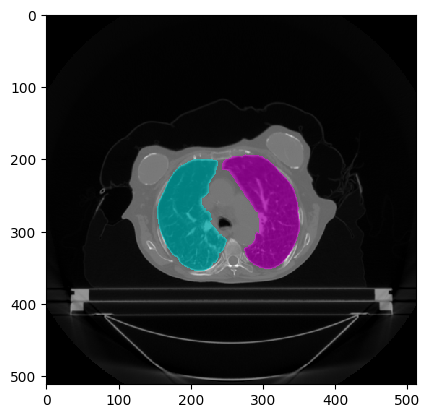

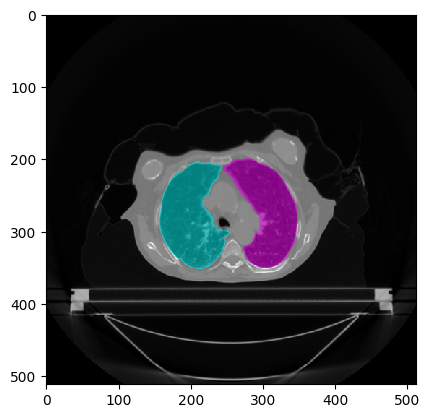

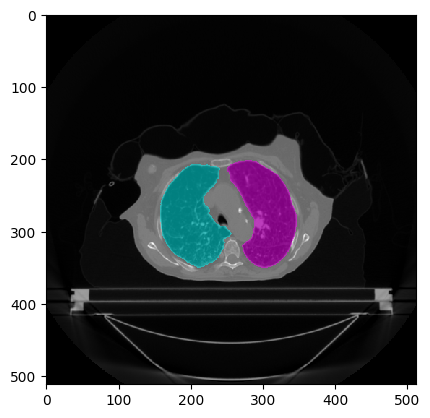

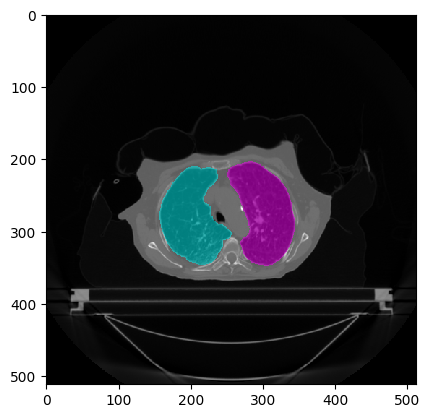

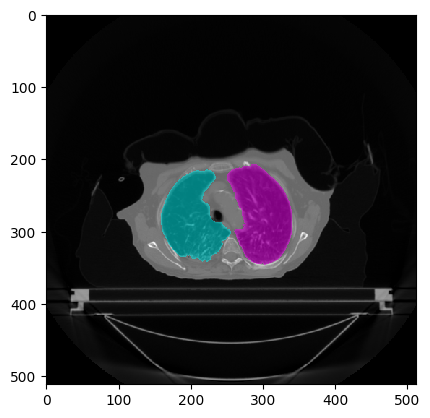

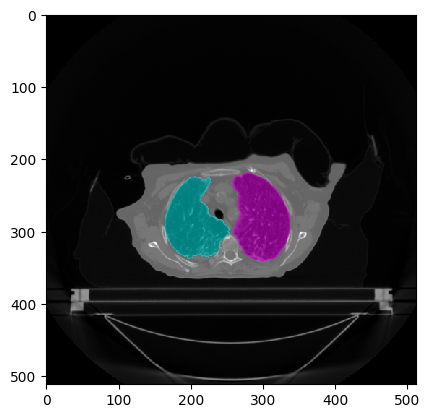

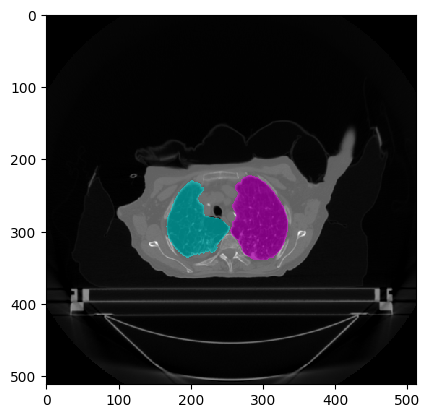

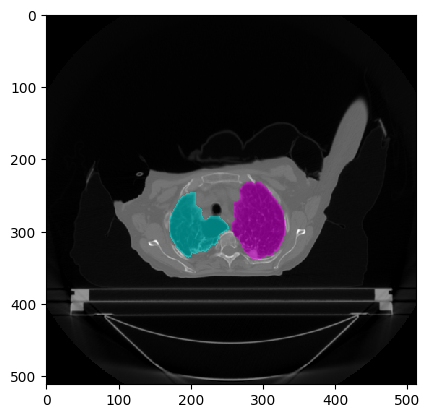

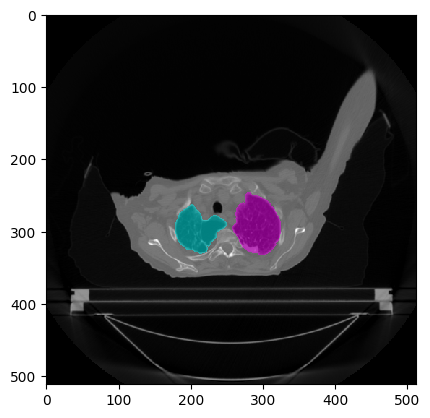

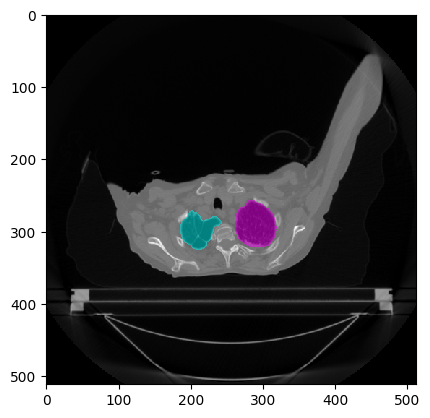

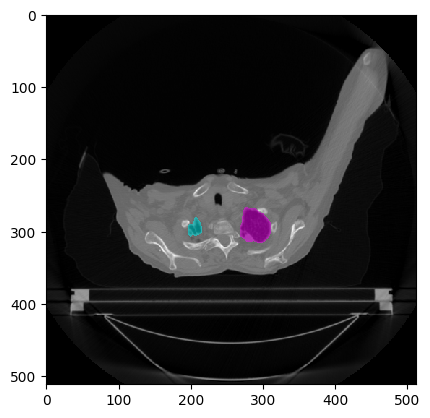

In [23]:
n_slices_skip = 4
display_slices(image, mask, skip = n_slices_skip) # visualize that our segmentations were succesfully convereted

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
"""## initialize DicomRTTool"""
import pandas as pd
from torch.utils.data import Dataset


In [34]:
# Load the labels from the Excel file
labels_df = pd.read_excel('label.xlsx')

class CTMaskDataset(Dataset):
    def __init__(self, image, mask, labels_df):
        self.image = image
        self.mask = mask
        self.labels_df = labels_df

    def __len__(self):
        return len(self.image)

    def __getitem__(self, idx):
        img_slice = self.image[idx]
        mask_slice = self.mask[idx]

        # Normalize the image slice
        img_slice = (img_slice - img_slice.min()) / (img_slice.max() - img_slice.min())
        img_slice = torch.tensor(img_slice[np.newaxis], dtype=torch.float32)

        # Convert mask into binary format (0 for background, 1 for lungs)
        mask_slice = np.where(mask_slice > 0, 1, 0)
        mask_slice = torch.tensor(mask_slice, dtype=torch.long)

        # Get the corresponding label from the Excel file
        anon_id = self.labels_df.iloc[idx]['anon_id']  # Assuming 'anon_id' is the column name for the anonymous id
        label = self.labels_df.loc[self.labels_df['anon_id'] == anon_id, 'pneumonitis'].values[0]  # Assuming 'label' is the column name for the labels

        return img_slice, mask_slice, label

# Create the dataset and data loader
dataset = CTMaskDataset(image, mask, labels_df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [42]:

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 128 * 128, 512)
        self.fc2 = nn.Linear(512, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 128 * 128)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [ ]:
# Check if a GPU is available and if not, default to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the model, loss function, and optimizer
model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Now you can use the model in your training loop
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, masks, labels) in enumerate(data_loader):
        # Move data and labels to device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs).float()
        labels = labels.long()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {running_loss / len(data_loader)}")
# Save the model
model_save_path = "./model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
torch.Size([4, 1, 512, 512])
